In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
df= pd.read_csv('C:\\Users\\intel\\Documents\\SHIASH\\homeworks\\Spam or Ham Prediction\\SpamMail.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [21]:
df.describe(include='all')

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [23]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

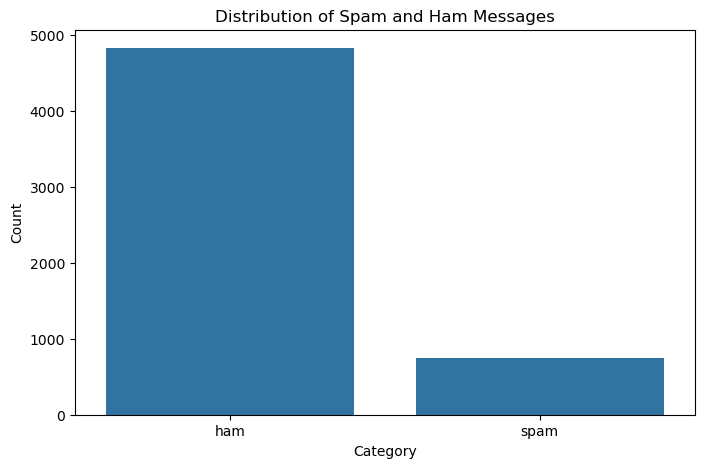

In [27]:
import seaborn as sns
import re
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

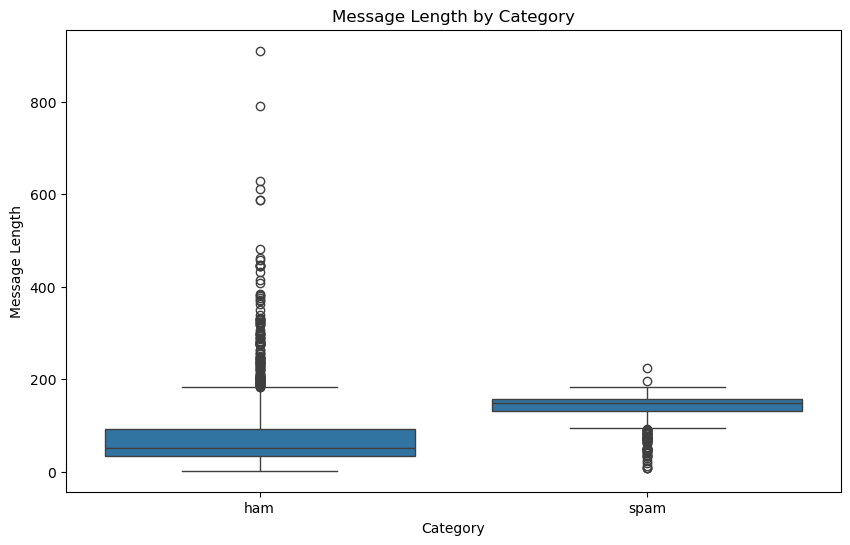

In [29]:
# Add a new column for message length
df['Message_Length'] = df['Message'].apply(len)

# Boxplot for message length
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Message_Length', data=df)
plt.title('Message Length by Category')
plt.xlabel('Category')
plt.ylabel('Message Length')
plt.show()


In [31]:
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'\W', ' ', text)  
    text = re.sub(r'\s+', ' ', text)  
    return text


In [33]:
df['Cleaned_Message'] = df['Message'].apply(clean_text)

In [35]:
df

,Category,Message,Message_Length,Cleaned_Message
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,this is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?,36,will ü b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,pity was in mood for that so any other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,125,the guy did some bitching but i acted like i d...


In [37]:
all_words = ' '.join(df['Cleaned_Message']).split()
word_counts = pd.Series(all_words).value_counts()

In [41]:
top_words = word_counts.head(10)
top_words

i      3021
to     2250
you    2245
a      1450
the    1336
u      1203
and     980
in      901
is      896
me      807
Name: count, dtype: int64

In [43]:
all_words

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 's',
 'apply',
 '08452810075over18',
 's',
 'u',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'then',
 'say',
 'nah',
 'i',
 'don',
 't',
 'think',
 'he',
 'goes',
 'to',
 'usf',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'freemsg',
 'hey',
 'there',
 'darling',
 'it',
 's',
 'been',
 '3',
 'week',
 's',
 'now',
 'and',
 'no',
 'word',
 'back',
 'i',
 'd',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'to',
 'send',
 '1',
 '50',
 'to'

In [45]:
word_counts

i             3021
to            2250
you           2245
a             1450
the           1336
              ... 
apologize        1
47per            1
satsgettin       1
crammed          1
bitching         1
Name: count, Length: 8749, dtype: int64

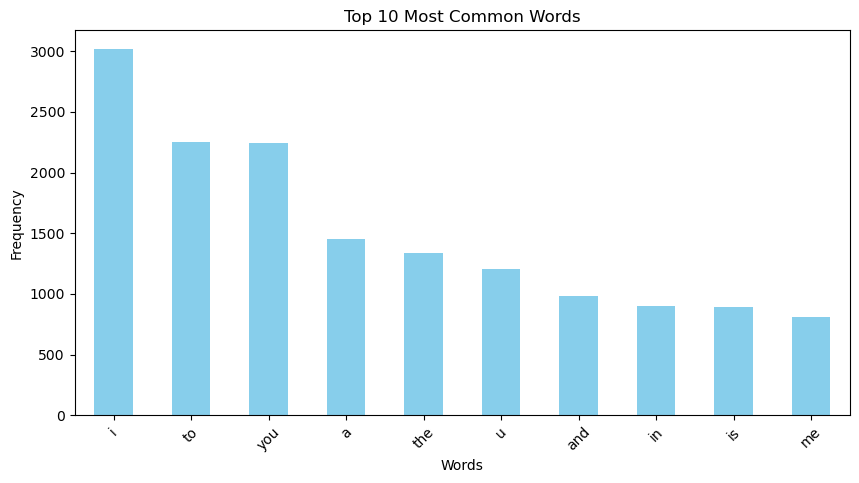

In [47]:
plt.figure(figsize=(10, 5))
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

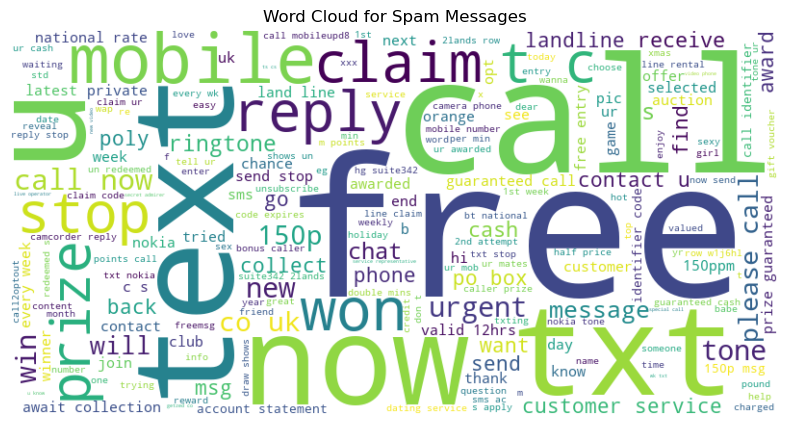

In [51]:
from wordcloud import WordCloud

spam_words = ' '.join(df[df['Category'] == 'spam']['Cleaned_Message'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()


In [53]:
# Preprocess the data
X = df['Message']
y = df['Category'].map({'ham': 0, 'spam': 1})

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [59]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

In [61]:
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

In [63]:
print("Accuracy Scores:")
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name}: {accuracy:.4f}")

Accuracy Scores:
Logistic Regression: 0.9701
Naive Bayes: 0.9617
Support Vector Machine: 0.9862
K-Nearest Neighbors: 0.9079
Decision Tree: 0.9653


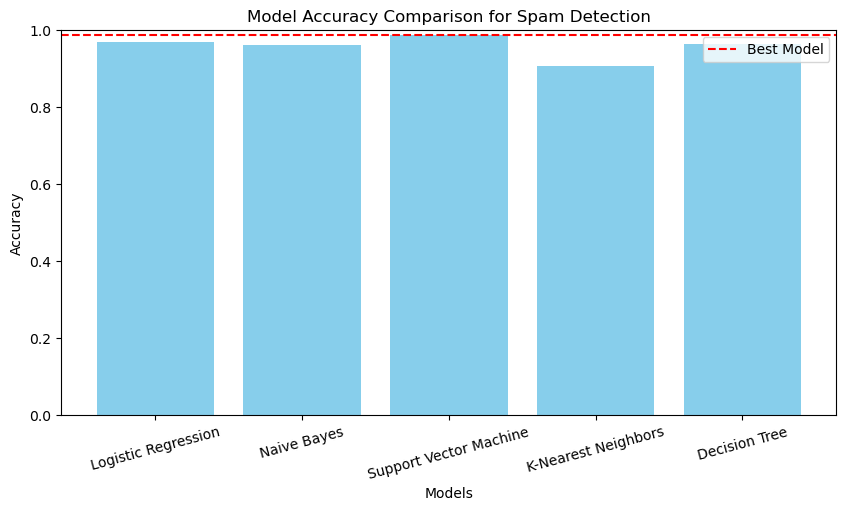

In [65]:
plt.figure(figsize=(10, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for Spam Detection')
plt.ylim(0, 1)
plt.axhline(y=max(accuracy_scores.values()), color='red', linestyle='--', label='Best Model')
plt.legend()
plt.xticks(rotation=15)
plt.show()

In [67]:
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model_accuracy = accuracy_scores[best_model_name]

In [69]:
print(f"\nThe best model for spam detection is: {best_model_name} with an accuracy of {best_model_accuracy:.4f}")


The best model for spam detection is: Support Vector Machine with an accuracy of 0.9862


In [71]:
best_model_name = "Support Vector Machine"
best_model = SVC() 
best_model.fit(X_train_tfidf, y_train) 

SVC()

In [75]:
import joblib
joblib.dump(best_model, 'spam_detection_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
